# Data Mining Project

# Stroke Prediction

### Submitted By -

Bhavyaa Garg

College Roll No. : 8166

University Roll No. : 19025570012

B.Sc. (H) Computer Science, Sem VI

Hansraj College,DU

## a) Dataset Description

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
strokedf=pd.read_csv("healthcare-dataset-stroke-data.csv")   
strokedf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
print("Rows : ",strokedf.shape[0])
print("Columns : ",strokedf.shape[1])

Rows :  5110
Columns :  12


In [4]:
strokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
strokedf.describe(include=object)

,gender,ever_married,work_type,residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [6]:
strokedf.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
strokedf.corr()['stroke']

id                   0.006388
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.042374
stroke               1.000000
Name: stroke, dtype: float64

In [8]:
strokecnt=strokedf.groupby('stroke').count()['id']
strokecnt

stroke
0    4861
1     249
Name: id, dtype: int64

So, there are 4861 rows with stroke label 0 i.e. patient didn't had a stroke, and 249 rows with label 1 i.e patient did had a stroke. 

## b) Graphs and Visualizations

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

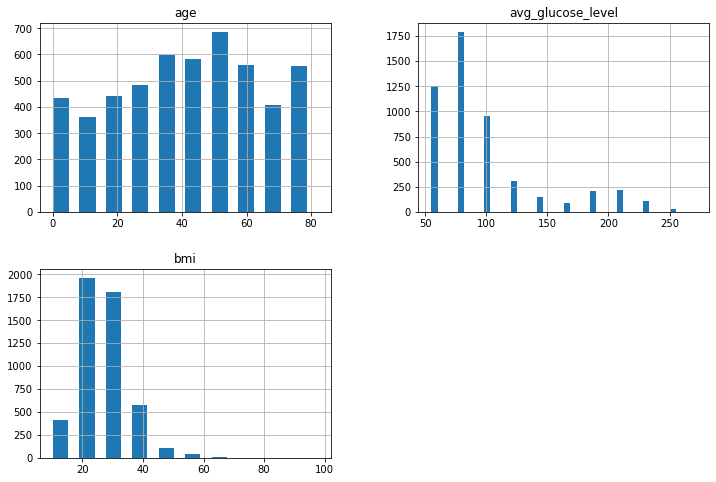

In [9]:
strokedf.hist(column=['age','avg_glucose_level','bmi'],width=5,figsize=(12,8))

array([[<AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>]],
      dtype=object)

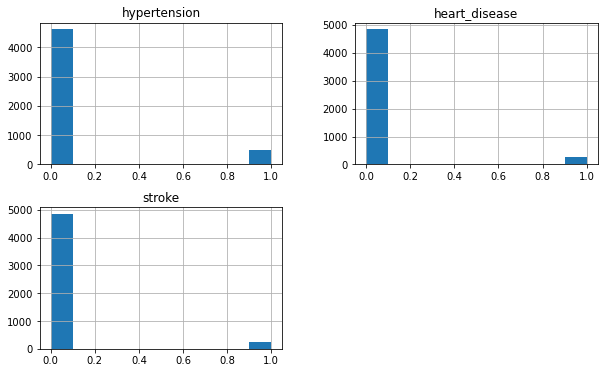

In [10]:
strokedf.hist(column=['hypertension','heart_disease','stroke'],figsize=(10,6))

<AxesSubplot:title={'center':'smoking_status'}>

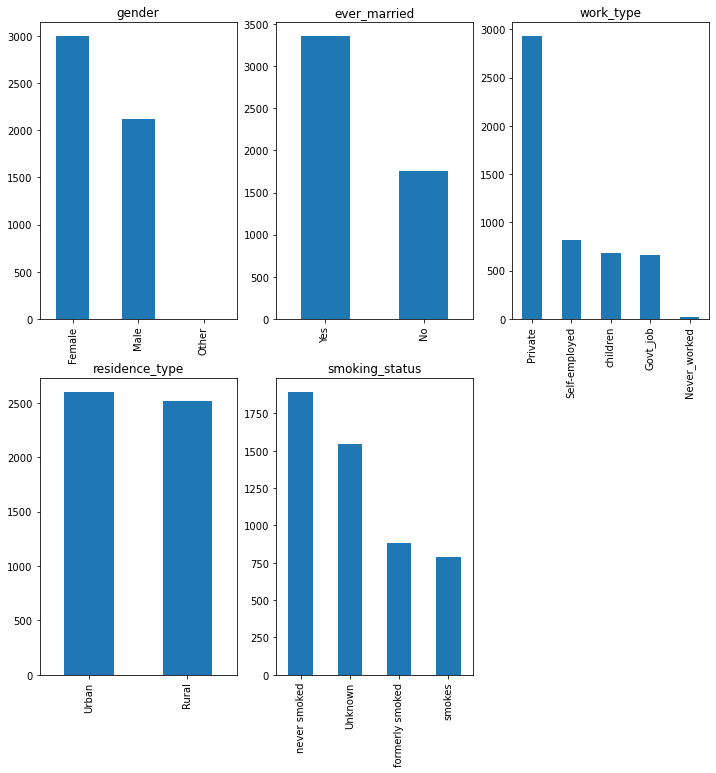

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(2,3,1)
strokedf['gender'].value_counts().plot(kind='bar',title='gender')
plt.subplot(2,3,2)
strokedf['ever_married'].value_counts().plot(kind='bar',title='ever_married')
plt.subplot(2,3,3)
strokedf['work_type'].value_counts().plot(kind='bar',title='work_type')
plt.subplot(2,3,4)
strokedf['residence_type'].value_counts().plot(kind='bar',title='residence_type')
plt.subplot(2,3,5)
strokedf['smoking_status'].value_counts().plot(kind='bar',title='smoking_status')

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

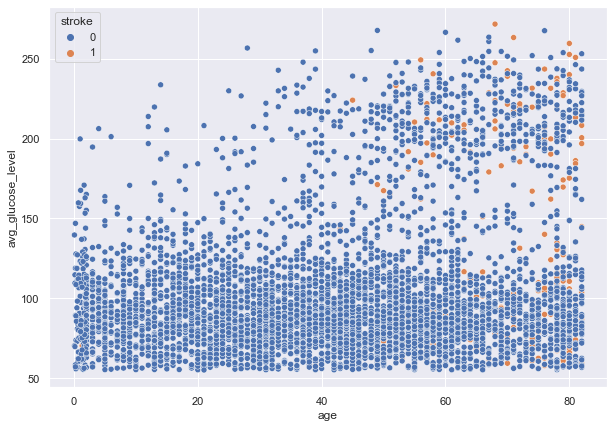

In [12]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.scatterplot(x=strokedf['age'],y=strokedf['avg_glucose_level'],hue=strokedf['stroke'])

<AxesSubplot:xlabel='age', ylabel='bmi'>

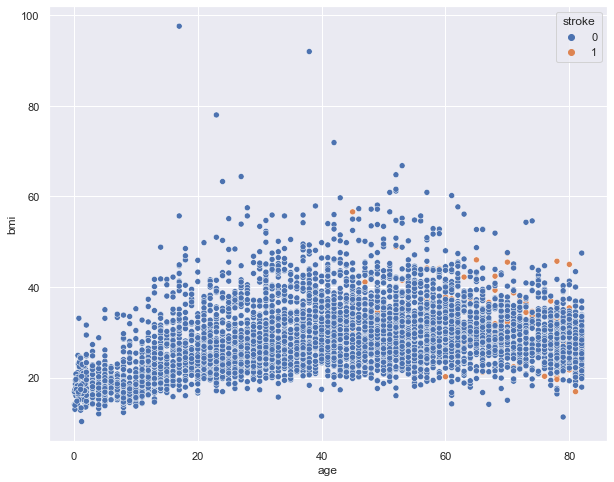

In [13]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.scatterplot(x=strokedf['age'],y=strokedf['bmi'],hue=strokedf['stroke'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

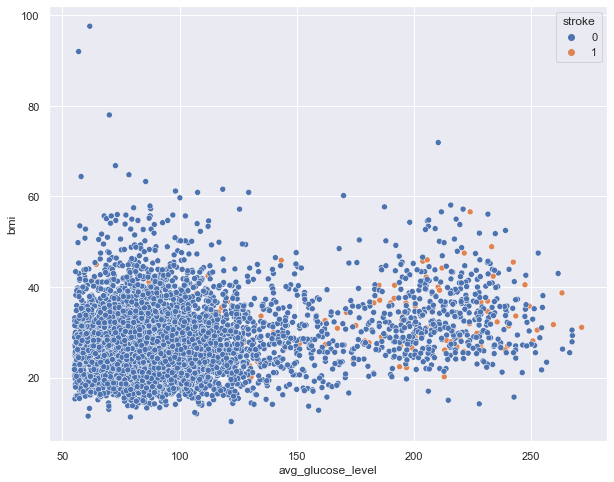

In [14]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.scatterplot(x=strokedf['avg_glucose_level'],y=strokedf['bmi'],hue=strokedf['stroke'])

## c) Preprocessing

### i) Detecting Outliers

In [15]:
for i in strokedf:
    print(strokedf[i].unique())

[ 9046 51676 31112 ... 19723 37544 44679]
['Male' 'Female' 'Other']
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4

So, no outliers were detected

### ii) Label Encoding categorical columns

In [16]:
from sklearn.preprocessing import LabelEncoder

number=LabelEncoder()

strokedf['gender'] = number.fit_transform(strokedf['gender'])
strokedf['ever_married'] = number.fit_transform(strokedf['ever_married'])
strokedf['work_type'] = number.fit_transform(strokedf['work_type'])
strokedf['residence_type'] = number.fit_transform(strokedf['residence_type'])
strokedf['smoking_status'] = number.fit_transform(strokedf['smoking_status'])

strokedf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


### iii) Changing  data types of columns

In [17]:
strokedf['id']=strokedf['id'].astype(object)
strokedf['age']=strokedf['age'].astype(int)
strokedf['hypertension']=strokedf['hypertension'].astype(object)
strokedf['heart_disease']=strokedf['heart_disease'].astype(object)
strokedf['stroke']=strokedf['stroke'].astype(object)
strokedf['gender']=strokedf['gender'].astype(object)
strokedf['ever_married']=strokedf['ever_married'].astype(object)
strokedf['work_type']=strokedf['work_type'].astype(object)
strokedf['residence_type']=strokedf['residence_type'].astype(object)
strokedf['smoking_status']=strokedf['smoking_status'].astype(object)

In [18]:
strokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   object 
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int32  
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(2), int32(1), object(9)
memory usage: 459.2+ KB


### iv) Handling missing data

In [19]:
strokedf.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We are going to fill the null values with class-wise mean of bmi.

In [20]:
bmi_mean=strokedf.groupby('stroke').mean()['bmi']
bmi_mean

stroke
0    28.823064
1    30.471292
Name: bmi, dtype: float64

In [21]:
strokedf['bmi']=strokedf['bmi'].fillna(strokedf.groupby('stroke')['bmi'].transform('mean'))

In [22]:
strokedf['bmi']=strokedf['bmi'].fillna(strokedf['bmi'].mean())

In [23]:
strokedf.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### v) Normalizing Columns

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
strokedf[['age','avg_glucose_level','bmi']].aggregate(['mean','std']).T

,mean,std
age,43.215264,22.633866
avg_glucose_level,106.147677,45.283560
bmi,28.903379,7.699287


In [26]:
scaler=StandardScaler()
strokedf['age']=scaler.fit_transform(strokedf[['age']])
strokedf['avg_glucose_level']=scaler.fit_transform(strokedf[['avg_glucose_level']])
strokedf['bmi']=scaler.fit_transform(strokedf[['bmi']])

In [27]:
strokedf[['age','avg_glucose_level','bmi']].aggregate(['mean','std']).T

,mean,std
age,-4.780653e-16,1.000098
avg_glucose_level,1.012345e-16,1.000098
bmi,-3.307530e-16,1.000098


### After preprocessing -

In [28]:
strokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   object 
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), object(9)
memory usage: 479.2+ KB


In [29]:
strokedf.describe()

,age,avg_glucose_level,bmi
count,5.110000e+03,5.110000e+03,5.110000e+03
mean,-4.780653e-16,1.012345e-16,-3.307530e-16
std,1.000098e+00,1.000098e+00,1.000098e+00
min,-1.909506e+00,-1.126958e+00,-2.416483e+00
25%,-8.048579e-01,-6.383223e-01,-6.629027e-01
50%,7.886017e-02,-3.149945e-01,-6.538630e-02
75%,7.858347e-01,1.754080e-01,5.061511e-01
max,1.713739e+00,3.657145e+00,8.923338e+00


In [30]:
strokedf.describe(include=object)

,id,gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110,5110
unique,5110,3,2,2,2,5,2,4,2
top,49152,0,0,0,1,2,1,2,0
freq,1,2994,4612,4834,3353,2925,2596,1892,4861


In [31]:
strokedf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1.050950,0,1,1,2,1,2.706375,0.999752,1,1
1,51676,0,0.785835,0,0,1,3,0,2.121559,0.203664,2,1
2,31112,1,1.625367,0,1,1,2,0,-0.005028,0.467183,2,1
3,60182,0,0.255604,0,0,1,2,1,1.437358,0.713983,3,1
4,1665,0,1.581181,1,0,1,3,0,1.501184,-0.636924,2,1


In [32]:
strokedf.groupby('stroke').count()['id']

stroke
0    4861
1     249
Name: id, dtype: int64

## d) Classification

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix

In [34]:
X=strokedf.iloc[:,1:10].values
Y=strokedf['stroke'].astype('int')

In [35]:
results=pd.DataFrame(columns=['Classifier','Evaluator','Parameters','Accuracy','Precision','Recall','F1'])

## i) Naive Bayes

### -> Hold Out Method

### * With train-test split 75-25

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 5, stratify=Y)
Y_train.value_counts()

0    3645
1     187
Name: stroke, dtype: int64

In [37]:
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, Y_train)
Y_pred = nvclassifier.predict(X_test)

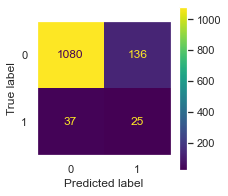

In [38]:
fig,ax=plt.subplots(figsize=(3,3))
plot_confusion_matrix(nvclassifier,X_test,Y_test,ax=ax)
plt.grid(False)

In [39]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Precision : ",precision_score(Y_test,Y_pred))
print('Recall : ',recall_score(Y_test,Y_pred))
print('F1 score  : ',f1_score(Y_test,Y_pred))

Accuracy :  0.8646322378716745
Precision :  0.15527950310559005
Recall :  0.4032258064516129
F1 score  :  0.22421524663677128


In [40]:
results.loc[len(results.index)]=['Naive Bayes','Hold Out','train-test = 75-25',accuracy_score(Y_test,Y_pred),
                            precision_score(Y_test,Y_pred),recall_score(Y_test,Y_pred),f1_score(Y_test,Y_pred)]

### * With train-test split 66.6-33.3

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.333, random_state = 5, stratify=Y)
Y_train.value_counts()

0    3242
1     166
Name: stroke, dtype: int64

In [42]:
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, Y_train)
Y_pred = nvclassifier.predict(X_test)

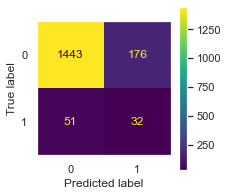

In [43]:
fig,ax=plt.subplots(figsize=(3,3))
plot_confusion_matrix(nvclassifier,X_test,Y_test,ax=ax)
plt.grid(False)

In [44]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Precision : ",precision_score(Y_test,Y_pred))
print('Recall : ',recall_score(Y_test,Y_pred))
print('F1 score  : ',f1_score(Y_test,Y_pred))

Accuracy :  0.8666274970622797
Precision :  0.15384615384615385
Recall :  0.3855421686746988
F1 score  :  0.21993127147766325


In [45]:
results.loc[len(results.index)]=['Naive Bayes','Hold Out','train-test = 66.6-33.3',accuracy_score(Y_test,Y_pred),
                            precision_score(Y_test,Y_pred),recall_score(Y_test,Y_pred),f1_score(Y_test,Y_pred)]

### -> Random Subsampling Method

In [46]:
accuracy_nv=0
precision_nv=0
recall_nv=0
f1_nv=0
for i in range(50) :
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = i, stratify=Y)
    nvclassifier = GaussianNB()
    nvclassifier.fit(X_train, Y_train)
    Y_pred = nvclassifier.predict(X_test)
    accuracy_nv=accuracy_nv+accuracy_score(Y_test,Y_pred)
    precision_nv=precision_nv+precision_score(Y_test,Y_pred)
    recall_nv=recall_nv+recall_score(Y_test,Y_pred)
accuracy_nv=accuracy_nv/50
precision_nv=precision_nv/50
recall_nv=recall_nv/50
f1_nv=(2*precision_nv*recall_nv)/(precision_nv+recall_nv)

In [47]:
print("Accuracy : ",accuracy_nv)
print("Precision : ",precision_nv)
print('Recall : ',recall_nv)
print('F1 score  : ',f1_nv)

Accuracy :  0.8677777777777779
Precision :  0.15877152120774465
Recall :  0.4012903225806451
F1 score  :  0.22752299828569894


In [48]:
results.loc[len(results.index)]=['Naive Bayes','Random Subsampling','train-test = 75-25',accuracy_nv,precision_nv,
                                 recall_nv,f1_nv]

### -> K-Fold Cross Validation

In [49]:
kf = StratifiedKFold(n_splits=10)

In [50]:
accuracy_nv_kf=0
precision_nv_kf=0
recall_nv_kf=0
f1_nv_kf=0
a_nv=[]
p_nv=[]
r_nv=[]

In [51]:
for train_index,test_index in kf.split(X,Y) :
    X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    nvclassifier = GaussianNB()
    nvclassifier.fit(X_train, Y_train)
    Y_pred = nvclassifier.predict(X_test)
    accuracy_nv_kf=accuracy_nv_kf+accuracy_score(Y_test,Y_pred)
    precision_nv_kf=precision_nv_kf+precision_score(Y_test,Y_pred)
    recall_nv_kf=recall_nv_kf+recall_score(Y_test,Y_pred)
    a_nv.append(accuracy_score(Y_test,Y_pred))
    p_nv.append(precision_score(Y_test,Y_pred))
    r_nv.append(recall_score(Y_test,Y_pred))

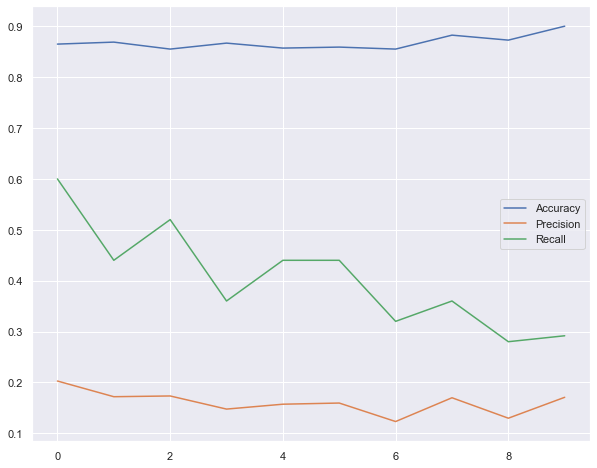

In [52]:
plt.plot(a_nv)
plt.plot(p_nv)
plt.plot(r_nv)
plt.legend(['Accuracy','Precision','Recall'])

In [53]:
accuracy_nv_kf=accuracy_nv_kf/10
precision_nv_kf=precision_nv_kf/10
recall_nv_kf=recall_nv_kf/10
f1_nv_kf=(2*precision_nv_kf*recall_nv_kf)/(precision_nv_kf+recall_nv_kf)

In [54]:
print("Accuracy : ",accuracy_nv_kf)
print("Precision : ",precision_nv_kf)
print('Recall : ',recall_nv_kf)
print('F1 score  : ',f1_nv_kf)

Accuracy :  0.8682974559686889
Precision :  0.16052647474188658
Recall :  0.4051666666666667
F1 score  :  0.2299479061067423


In [55]:
results.loc[len(results.index)]=['Naive Bayes','K-Fold Cross Validation','train-test = 75-25',accuracy_nv_kf,
                            precision_nv_kf,recall_nv_kf,f1_nv_kf]

## ii) Decision Tree

### -> Hold Out Method

### * Using Gini Index

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 5, stratify=Y)
Y_train.value_counts()

0    3645
1     187
Name: stroke, dtype: int64

In [57]:
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)

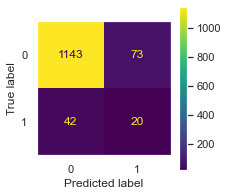

In [58]:
fig,ax=plt.subplots(figsize=(3,3))
plot_confusion_matrix(dtc,X_test,Y_test,ax=ax)
plt.grid(False)

In [59]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Precision : ",precision_score(Y_test,Y_pred))
print('Recall : ',recall_score(Y_test,Y_pred))
print('F1 score  : ',f1_score(Y_test,Y_pred))

Accuracy :  0.9100156494522692
Precision :  0.21505376344086022
Recall :  0.3225806451612903
F1 score  :  0.25806451612903225


In [60]:
results.loc[len(results.index)]=['Decision Tree','Hold Out','Gini index',accuracy_score(Y_test,Y_pred),
                            precision_score(Y_test,Y_pred),recall_score(Y_test,Y_pred),f1_score(Y_test,Y_pred)]

### * Using entropy

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 5, stratify=Y)
Y_train.value_counts()

0    3645
1     187
Name: stroke, dtype: int64

In [62]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)

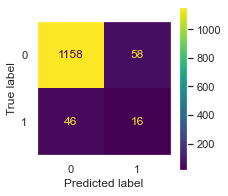

In [63]:
fig,ax=plt.subplots(figsize=(3,3))
plot_confusion_matrix(dtc,X_test,Y_test,ax=ax)
plt.grid(False)

In [64]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Precision : ",precision_score(Y_test,Y_pred))
print('Recall : ',recall_score(Y_test,Y_pred))
print('F1 score  : ',f1_score(Y_test,Y_pred))

Accuracy :  0.918622848200313
Precision :  0.21621621621621623
Recall :  0.25806451612903225
F1 score  :  0.23529411764705882


In [65]:
results.loc[len(results.index)]=['Decision Tree','Hold Out','Entropy',accuracy_score(Y_test,Y_pred),
                            precision_score(Y_test,Y_pred),recall_score(Y_test,Y_pred),f1_score(Y_test,Y_pred)]

### -> Random Subsampling

In [66]:
accuracy_dtc=0
precision_dtc=0
recall_dtc=0
f1_dtc=0
for i in range(50) :
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = i, stratify=Y)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, Y_train)
    Y_pred = dtc.predict(X_test)
    accuracy_dtc=accuracy_dtc+accuracy_score(Y_test,Y_pred)
    precision_dtc=precision_dtc+precision_score(Y_test,Y_pred)
    recall_dtc=recall_dtc+recall_score(Y_test,Y_pred)
accuracy_dtc=accuracy_dtc/50
precision_dtc=precision_dtc/50
recall_dtc=recall_dtc/50
f1_dtc=(2*precision_dtc*recall_dtc)/(precision_dtc+recall_dtc)

In [67]:
print("Accuracy : ",accuracy_dtc)
print("Precision : ",precision_dtc)
print('Recall : ',recall_dtc)
print('F1 score  : ',f1_dtc)

Accuracy :  0.9165414710485135
Precision :  0.18421929851390267
Recall :  0.21161290322580645
F1 score  :  0.19696821237592466


In [68]:
results.loc[len(results.index)]=['Decision Tree','Random Subsampling','Gini index',accuracy_dtc,precision_dtc,
                                 recall_dtc,f1_dtc]

### -> K-Fold Cross Validation

In [69]:
kf = StratifiedKFold(n_splits=10)

In [70]:
accuracy_dtc_kf=0
precision_dtc_kf=0
recall_dtc_kf=0
f1_dtc_kf=0
a_dtc=[]
p_dtc=[]
r_dtc=[]

In [71]:
for train_index,test_index in kf.split(X,Y) :
    X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    dtc_kf = DecisionTreeClassifier()
    dtc_kf.fit(X_train, Y_train)
    Y_pred = dtc_kf.predict(X_test)
    accuracy_dtc_kf=accuracy_dtc_kf+accuracy_score(Y_test,Y_pred)
    precision_dtc_kf=precision_dtc_kf+precision_score(Y_test,Y_pred)
    recall_dtc_kf=recall_dtc_kf+recall_score(Y_test,Y_pred)
    a_dtc.append(accuracy_score(Y_test,Y_pred))
    p_dtc.append(precision_score(Y_test,Y_pred))
    r_dtc.append(recall_score(Y_test,Y_pred))

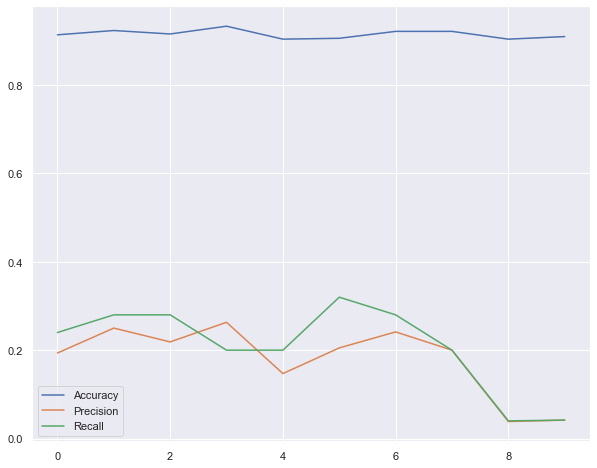

In [72]:
plt.plot(a_dtc)
plt.plot(p_dtc)
plt.plot(r_dtc)
plt.legend(['Accuracy','Precision','Recall'])

In [73]:
accuracy_dtc_kf=accuracy_dtc_kf/10
precision_dtc_kf=precision_dtc_kf/10
recall_dtc_kf=recall_dtc_kf/10
f1_dtc_kf=(2*precision_dtc_kf*recall_dtc_kf)/(precision_dtc_kf+recall_dtc_kf)

In [74]:
print("Accuracy : ",accuracy_dtc_kf)
print("Precision : ",precision_dtc_kf)
print('Recall : ',recall_dtc_kf)
print('F1 score  : ',f1_dtc_kf)

Accuracy :  0.9154598825831703
Precision :  0.17991508259642658
Recall :  0.20816666666666667
F1 score  :  0.1930125448994819


In [75]:
results.loc[len(results.index)]=['Decision Tree','K-Fold Cross Validation','Gini index',accuracy_dtc_kf,
                            precision_dtc_kf,recall_dtc_kf,f1_dtc_kf]

## iii) K-Nearest Neighbor

### -> Hold Out Method

### * With 1 neighbor

In [76]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 5, stratify=Y)
Y_train.value_counts()

0    3645
1     187
Name: stroke, dtype: int64

In [77]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

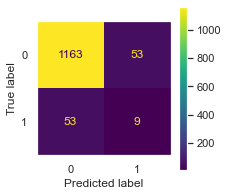

In [78]:
fig,ax=plt.subplots(figsize=(3,3))
plot_confusion_matrix(knn,X_test,Y_test,ax=ax)
plt.grid(False)

In [79]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Precision : ",precision_score(Y_test,Y_pred))
print('Recall : ',recall_score(Y_test,Y_pred))
print('F1 score  : ',f1_score(Y_test,Y_pred))

Accuracy :  0.917057902973396
Precision :  0.14516129032258066
Recall :  0.14516129032258066
F1 score  :  0.14516129032258066


In [80]:
results.loc[len(results.index)]=['K-Nearest Neighbor','Hold Out','1 neighbor',accuracy_score(Y_test,Y_pred),
                            precision_score(Y_test,Y_pred),recall_score(Y_test,Y_pred),f1_score(Y_test,Y_pred)]

### * With 3 neighbors

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 5, stratify=Y)
Y_train.value_counts()

0    3645
1     187
Name: stroke, dtype: int64

In [82]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

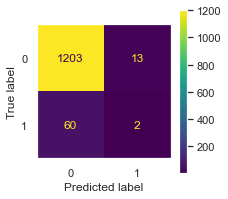

In [83]:
fig,ax=plt.subplots(figsize=(3,3))
plot_confusion_matrix(knn,X_test,Y_test,ax=ax)
plt.grid(False)

In [84]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Precision : ",precision_score(Y_test,Y_pred))
print('Recall : ',recall_score(Y_test,Y_pred))
print('F1 score  : ',f1_score(Y_test,Y_pred))

Accuracy :  0.9428794992175273
Precision :  0.13333333333333333
Recall :  0.03225806451612903
F1 score  :  0.05194805194805195


In [85]:
results.loc[len(results.index)]=['K-Nearest Neighbor','Hold Out','3 neighbors',accuracy_score(Y_test,Y_pred),
                            precision_score(Y_test,Y_pred),recall_score(Y_test,Y_pred),f1_score(Y_test,Y_pred)]

###  * With 5 neighbors

In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 5, stratify=Y)
Y_train.value_counts()

0    3645
1     187
Name: stroke, dtype: int64

In [87]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

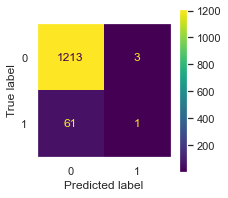

In [88]:
fig,ax=plt.subplots(figsize=(3,3))
plot_confusion_matrix(knn,X_test,Y_test,ax=ax)
plt.grid(False)

In [89]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Precision : ",precision_score(Y_test,Y_pred))
print('Recall : ',recall_score(Y_test,Y_pred))
print('F1 score  : ',f1_score(Y_test,Y_pred))

Accuracy :  0.9499217527386542
Precision :  0.25
Recall :  0.016129032258064516
F1 score  :  0.030303030303030304


In [90]:
results.loc[len(results.index)]=['K-Nearest Neighbor','Hold Out','5 neighbors',accuracy_score(Y_test,Y_pred),
                            precision_score(Y_test,Y_pred),recall_score(Y_test,Y_pred),f1_score(Y_test,Y_pred)]

### * With 3 neighbors and distance for weights

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 5, stratify=Y)
Y_train.value_counts()

0    3645
1     187
Name: stroke, dtype: int64

In [92]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

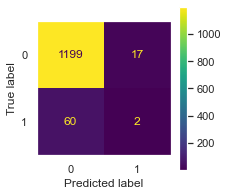

In [93]:
fig,ax=plt.subplots(figsize=(3,3))
plot_confusion_matrix(knn,X_test,Y_test,ax=ax)
plt.grid(False)

In [94]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Precision : ",precision_score(Y_test,Y_pred))
print('Recall : ',recall_score(Y_test,Y_pred))
print('F1 score  : ',f1_score(Y_test,Y_pred))

Accuracy :  0.9397496087636933
Precision :  0.10526315789473684
Recall :  0.03225806451612903
F1 score  :  0.04938271604938271


In [95]:
results.loc[len(results.index)]=['K-Nearest Neighbor','Hold Out','3 neighbors and distance weighted',
                                 accuracy_score(Y_test,Y_pred),precision_score(Y_test,Y_pred),
                                 recall_score(Y_test,Y_pred),f1_score(Y_test,Y_pred)]

### -> Random Subsampling

In [96]:
accuracy_knn=0
precision_knn=0
recall_knn=0
f1_knn=0
for i in range(50) :
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = i, stratify=Y)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy_knn=accuracy_knn+accuracy_score(Y_test,Y_pred)
    precision_knn=precision_knn+precision_score(Y_test,Y_pred)
    recall_knn=recall_knn+recall_score(Y_test,Y_pred)
accuracy_knn=accuracy_knn/50
precision_knn=precision_knn/50
recall_knn=recall_knn/50
f1_knn=(2*precision_knn*recall_knn)/(precision_knn+recall_knn)

In [97]:
print("Accuracy : ",accuracy_knn)
print("Precision : ",precision_knn)
print('Recall : ',recall_knn)
print('F1 score  : ',f1_knn)

Accuracy :  0.9143818466353681
Precision :  0.10320574694718967
Recall :  0.10032258064516128
F1 score  :  0.10174374244249099


In [98]:
results.loc[len(results.index)]=['K-Nearest Neighbor','Random Subsampling','1 neighbor',accuracy_knn,precision_knn,
                                 recall_knn,f1_knn]

### -> K-Fold Cross Validation

In [99]:
kf = StratifiedKFold(n_splits=10)

In [100]:
accuracy_knn_kf=0
precision_knn_kf=0
recall_knn_kf=0
f1_knn_kf=0
a_knn=[]
p_knn=[]
r_knn=[]

In [101]:
for train_index,test_index in kf.split(X,Y) :
    X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    knn_kf = KNeighborsClassifier(n_neighbors=1)
    knn_kf.fit(X_train, Y_train)
    Y_pred = knn_kf.predict(X_test)
    accuracy_knn_kf=accuracy_knn_kf+accuracy_score(Y_test,Y_pred)
    precision_knn_kf=precision_knn_kf+precision_score(Y_test,Y_pred)
    recall_knn_kf=recall_knn_kf+recall_score(Y_test,Y_pred)
    a_knn.append(accuracy_score(Y_test,Y_pred))
    p_knn.append(precision_score(Y_test,Y_pred))
    r_knn.append(recall_score(Y_test,Y_pred))

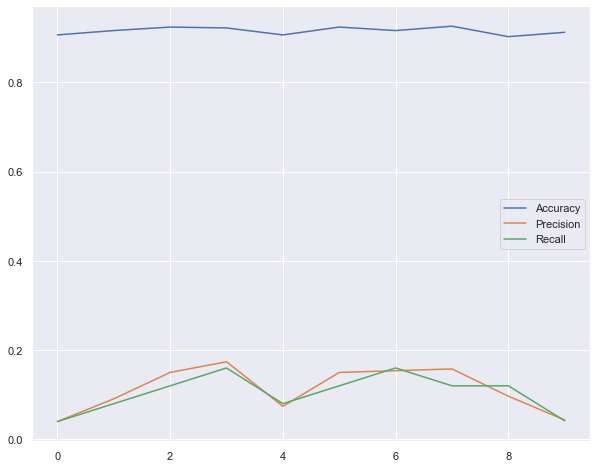

In [102]:
plt.plot(a_knn)
plt.plot(p_knn)
plt.plot(r_knn)
plt.legend(['Accuracy','Precision','Recall'])

In [103]:
accuracy_knn_kf=accuracy_knn_kf/10
precision_knn_kf=precision_knn_kf/10
recall_knn_kf=recall_knn_kf/10
f1_knn_kf=(2*precision_knn_kf*recall_knn_kf)/(precision_knn_kf+recall_knn_kf)

In [104]:
print("Accuracy : ",accuracy_knn_kf)
print("Precision : ",precision_knn_kf)
print('Recall : ',recall_knn_kf)
print('F1 score  : ',f1_knn_kf)

Accuracy :  0.9152641878669276
Precision :  0.1130889553567637
Recall :  0.10416666666666667
F1 score  :  0.10844460002106739


In [105]:
results.loc[len(results.index)]=['K-Nearest Neighbor','K-Fold Cross Validation','1 neighbor',accuracy_knn_kf,
                            precision_knn_kf,recall_knn_kf,f1_knn_kf]

## e) Results

In [106]:
results=results.set_index(['Classifier','Evaluator','Parameters'])

In [107]:
results

Accuracy  \
Classifier         Evaluator               Parameters                                    
Naive Bayes        Hold Out                train-test = 75-25                 0.864632   
                                           train-test = 66.6-33.3             0.866627   
                   Random Subsampling      train-test = 75-25                 0.867778   
                   K-Fold Cross Validation train-test = 75-25                 0.868297   
Decision Tree      Hold Out                Gini index                         0.910016   
                                           Entropy                            0.918623   
                   Random Subsampling      Gini index                         0.916541   
                   K-Fold Cross Validation Gini index                         0.915460   
K-Nearest Neighbor Hold Out                1 neighbor                         0.917058   
                                           3 neighbors                        0.942879   
                                           5 neighbors                        0.949922   
                                           3 neighbors and distance weighted  0.939750   
                   Random Subsampling      1 neighbor                         0.914382   
                   K-Fold Cross Validation 1 neighbor                         0.915264   

                                                                              Precision  \
Classifier         Evaluator               Parameters                                     
Naive Bayes        Hold Out                train-test = 75-25                  0.155280   
                                           train-test = 66.6-33.3              0.153846   
                   Random Subsampling      train-test = 75-25                  0.158772   
                   K-Fold Cross Validation train-test = 75-25                  0.160526   
Decision Tree      Hold Out                Gini index                          0.215054   
                                           Entropy                             0.216216   
                   Random Subsampling      Gini index                          0.184219   
                   K-Fold Cross Validation Gini index                          0.179915   
K-Nearest Neighbor Hold Out                1 neighbor                          0.145161   
                                           3 neighbors                         0.133333   
                                           5 neighbors                         0.250000   
                                           3 neighbors and distance weighted   0.105263   
                   Random Subsampling      1 neighbor                          0.103206   
                   K-Fold Cross Validation 1 neighbor                          0.113089   

                                                                                Recall  \
Classifier         Evaluator               Parameters                                    
Naive Bayes        Hold Out                train-test = 75-25                 0.403226   
                                           train-test = 66.6-33.3             0.385542   
                   Random Subsampling      train-test = 75-25                 0.401290   
                   K-Fold Cross Validation train-test = 75-25                 0.405167   
Decision Tree      Hold Out                Gini index                         0.322581   
                                           Entropy                            0.258065   
                   Random Subsampling      Gini index                         0.211613   
                   K-Fold Cross Validation Gini index                         0.208167   
K-Nearest Neighbor Hold Out                1 neighbor                         0.145161   
                                           3 neighbors                        0.032258   
                                           5 neighbors                        0.016129   
          

<AxesSubplot:xlabel='Classifier,Evaluator,Parameters'>

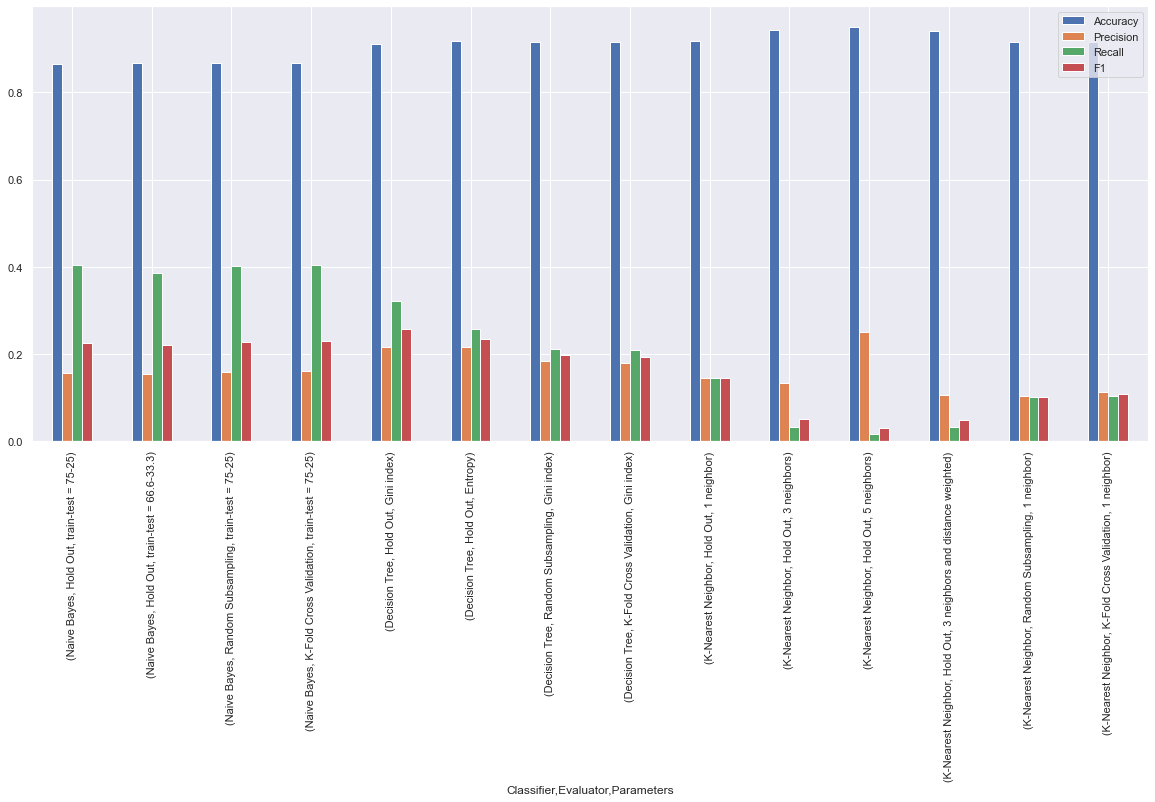

In [108]:
results.plot.bar(figsize=(20,8))

## f) Conclusions

#### Finally, the conclusions we could get from the table and graph for our different stroke prediction classification models are -

#### 1.
In terms of accuracy, KNN performed best and Naive Bayes performed worst. But as our data was very imbalanced, accuracy cannot give us the correct performace measure of a model. 

Though in terms of other measures none of the classifiers were up to the mark, but for precision Decision Tree was better and for recall Naive Bayes performed better than others. 

And if we compare overall accuracy and f1 score, Decision Tree is the best classifier here.

#### 2. 
Now comparing the three evaluation methods - Hold Out, Random Subsampling and Cross Validation

For Naive Bayes and Decision Tree, Random Subsampling gave us better metrics than Hold Out method, but for KNN it was worse. And same result for comparing Cross Validation and Hold Out too.

So, we cannot say which method gives us a better performance measure, though random Subsampling and Cross Validation are said to be better evaluators than Hold Out method as they compute model covering more data points for training and testing

#### 3.
On changing the ratio of train-test sets from 75-25 to 66.6-33.3, we saw the performance got worse for Naive Bayes classifier, concluding decreasing the data for training results in a worse model.

#### 4.
For Decision Tree, taking the impurity measure as Entropy resulted in a better model than taking measure as gini. Thus concluding entropy is a better impurity measure for computing decision tree model.

#### 5.  
In K-Nearest Neighbors, though taking neighbors as 1 resulted in the best model rather than taking neighbors as 3 or 5, it defeats the whole purpose of this method to take the the maximum occuring label out of many neighbors. KNN didn't give a good result here partially because our data is highly imbalanced, and because stroke label depends on some columns more than others.

Also, taking inverse of distance as weights resulted in a worse model than not taking any weights, thus again implying that the label depends more on few columns than the other, and the not required columns could be removed for further better classification.

#### Final conclusion -
Overall, we could conclude that all the classification models computed are still not at all ready to predict a very important health factor of stroke in the real world. A lot of work is required on handling the imbalanced nature of the data, filtering out the not required columns and other preprocessing. Also more research is required on the different classifiers and parameters to finally get the best model which could be one day used for real in the medical industry. 